<a href="https://colab.research.google.com/github/democodext/Credit-Risk-Analysis-Exploratory-Data-Analysis-EDA-/blob/Credit_EDA/CREDIT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Importing Libraries**

In [107]:
#import the warnings
import warnings
warnings.filterwarnings('ignore')

In [108]:
from ast import increment_lineno
# Import the Labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)



# **Read Application csv**

In [109]:
app_data = pd.read_csv('/content/application_data.csv', sep=',', on_bad_lines='skip')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [110]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# **Data Quality Check**
check for percentage for null values

In [111]:
pd.set_option('display.max_rows',200)
app_data.isnull().mean()*100

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.003902


### **Conclusion :** Cloumn with null values more than 47% may give us wrong  insight , hence will drop them
Dropping coloumns with missing values grataer than 47%

In [112]:

percentage=47
threshold=int(((100-percentage)/100)*app_data.shape[0]+1)
app_df = app_data.dropna(axis=1, thresh=threshold)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
app_df.shape

(307511, 73)

In [114]:
app_df.isnull().mean()*100

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.003902


**Impute missing values**

Check the missing values of application data set befroe imputing

In [115]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Occupation_type Column has 33% missing values, since it's a categorical imputing the mising values with unknown of other values

In [116]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

np.float64(31.345545362604916)

In [117]:

app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

,proportion
OCCUPATION_TYPE,
Laborers,26.139636
Sales staff,15.205570
Core staff,13.058924
Managers,10.122679
Drivers,8.811576
High skill tech staff,5.390299
Accountants,4.648067
Medicine staff,4.043672
Security staff,3.183498


Ext_Source_3_columns has 19% mising values

In [118]:
app_df.EXT_SOURCE_3.isnull().mean()*100

np.float64(19.825307062186393)

In [119]:


app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

,proportion
EXT_SOURCE_3,
0.746300,0.592182
0.713631,0.533369
0.694093,0.517550
0.670652,0.483074
0.652897,0.468067
...,...
0.028275,0.000406
0.858178,0.000406
0.849170,0.000406


In [120]:
app_df.EXT_SOURCE_3.describe()

,EXT_SOURCE_3
count,246546.000000
mean,0.510853
std,0.194844
min,0.000527
25%,0.370650
50%,0.535276
75%,0.669057
max,0.896010


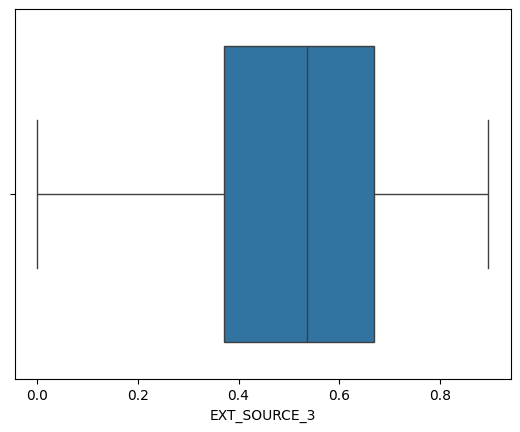

In [121]:
sns.boxplot(x=app_df.EXT_SOURCE_3)
plt.show()

Conclusion : since it's a numerical coloumns with no outliers and there is no much differnce bw Mean and Median
so i can impute mean and median

In [122]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(), inplace=True)

In [123]:
app_df.EXT_SOURCE_3.isnull().mean()*100

np.float64(0.0)

In [124]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

,proportion
EXT_SOURCE_3,
0.535276,20.080908
0.746300,0.474780
0.713631,0.427627
0.694093,0.414945
0.670652,0.387303
...,...
0.028275,0.000325
0.858178,0.000325
0.849170,0.000325


In [125]:
null_cols=list(app_df.isna().any())
len(null_cols)

73

In [126]:
app_df.isnull().mean()*100

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.003902


**Handling misssing values in columns with 13% null values**

In [127]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

,proportion
AMT_REQ_CREDIT_BUREAU_HOUR,
0.0,99.388703
1.0,0.586484
2.0,0.021053
3.0,0.003384
4.0,0.000376


In [128]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

,proportion
AMT_REQ_CREDIT_BUREAU_DAY,
0.0,99.440209
1.0,0.485729
2.0,0.039851
3.0,0.016918
4.0,0.009775
5.0,0.003384
6.0,0.003008
9.0,0.000752
8.0,0.000376


WE COULD SEE 99% VALUES IN THE COLUMNS AMT_REQ_CREDIT_BUREAU_HOUR	13.397376
AMT_REQ_CREDIT_BUREAU_DAY	13.397376
AMT_REQ_CREDIT_BUREAU_WEEK	13.397376
AMT_REQ_CREDIT_BUREAU_MON	13.397376
AMT_REQ_CREDIT_BUREAU_QRT	13.397376
AMT_REQ_CREDIT_BUREAU_YEAR

HENCE impute these columns with mode

In [129]:
cols=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for col in cols:
  app_df[col].fillna(app_df[col].mode()[0],inplace=True)

In [130]:
app_df.isnull().mean()*100


,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.003902


***HANDLING MISSING VALUS LESS THAN  1%***

In [131]:
null_cols=list(app_df.columns[app_df.isna().any()])
len(null_cols)

11

In [132]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

,proportion
NAME_TYPE_SUITE,
Unaccompanied,81.159562
Family,13.111205
"Spouse, partner",3.713029
Children,1.066884
Other_B,0.578018
Other_A,0.282804
Group of people,0.088499


In [133]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*100

,proportion
EXT_SOURCE_2,
0.285898,0.234967
0.262258,0.135897
0.265256,0.111781
0.159679,0.104937
0.265312,0.099723
...,...
0.353855,0.000326
0.200589,0.000326
0.146779,0.000326


In [134]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

,proportion
OBS_30_CNT_SOCIAL_CIRCLE,
0.0,53.479722
1.0,15.916669
2.0,9.725603
3.0,6.630559
4.0,4.614506
5.0,3.116904
6.0,2.105452
7.0,1.432347
8.0,0.968058


CONCLUSION:
-for catogrical columns, impute the missing values with mode
- for numerical columns , imputing the missing values with median

In [135]:
app_df['NAME_TYPE_SUITE'].fillna(app_df['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [136]:
app_df['CNT_FAM_MEMBERS'].fillna(app_df['CNT_FAM_MEMBERS'].mode()[0],inplace=True)

In [137]:
# IMPUTING NUMERICAL COLUMNS
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_3.median(), inplace=True)
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(), inplace=True)
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(), inplace=True)
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)

In [138]:
null_cols=list(app_df.columns[app_df.isna().any()])
len(null_cols)

1

In [139]:
app_df.isnull().mean()*100


,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.000000


In [140]:
app_df.DAYS_BIRTH=app_df.DAYS_BIRTH.apply(lambda x: abs(x))
app_df.DAYS_EMPLOYED=app_df.DAYS_EMPLOYED.apply(lambda x: abs(x))
app_df.DAYS_REGISTRATION=app_df.DAYS_REGISTRATION.apply(lambda x: abs(x))
app_df.DAYS_ID_PUBLISH=app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
app_df.DAYS_LAST_PHONE_CHANGE=app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

# Binning of continous variable
### standarizing / days/columns in years for easy bining

In [141]:
app_df['YEARS_BIRTH'] = app_df.DAYS_BIRTH.apply(lambda x: int(x//356))
app_df['YEARS_EMPLOYED'] = app_df.DAYS_EMPLOYED.apply(lambda x: int(x//356))
app_df['YEARS_REGISTRATION'] = app_df.DAYS_REGISTRATION.apply(lambda x: int(x//356))
app_df['YEARS_ID_PUBLISH'] = app_df.DAYS_ID_PUBLISH.apply(lambda x: int(x//356))
app_df['YEARS_LAST_PHONE_CHANGE'] = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(x//356))

BINING AMT_CREDIT COLOUMNS

In [142]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

,proportion
AMT_CREDIT,
450000.0,3.157285
675000.0,2.886726
225000.0,2.654214
180000.0,2.387557
270000.0,2.354713
...,...
425326.5,0.000325
1247643.0,0.000325
264600.0,0.000325


In [143]:
app_df.AMT_CREDIT.describe()

,AMT_CREDIT
count,3.075110e+05
mean,5.990260e+05
std,4.024908e+05
min,4.500000e+04
25%,2.700000e+05
50%,5.135310e+05
75%,8.086500e+05
max,4.050000e+06


In [144]:
app_df['AMT_CREDIT_category'] = pd.cut(app_df.AMT_CREDIT,[200000,400000,600000,800000,1000000, 1200000],labels=['very_low_credit', 'low_credit','medum_credit','high_credit','very_high_credit'])

In [145]:
app_df.AMT_CREDIT_category.value_counts(normalize=True)*100

,proportion
AMT_CREDIT_category,
very_low_credit,33.325804
low_credit,27.214712
medum_credit,17.757938
high_credit,12.615191
very_high_credit,9.086354


<Axes: xlabel='AMT_CREDIT_category'>

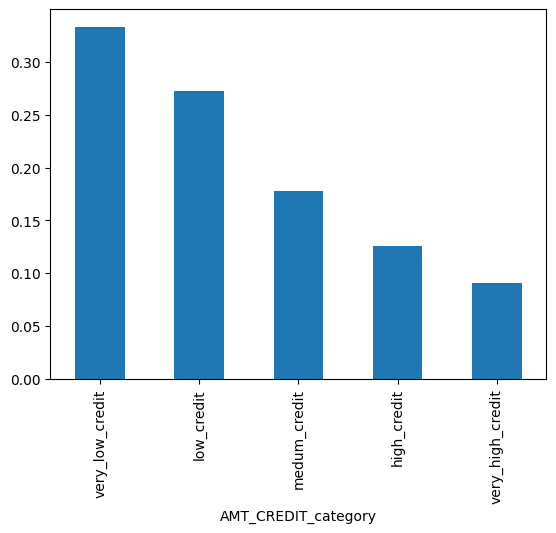

In [146]:
app_df['AMT_CREDIT_category'].value_counts(normalize=True).plot.bar()

# **CONCLUSION: **
the credit amount of the loan for amount low (2l to 4l) pr very high above 8L

# **BINING YEARS_BIRTH_COLUMNS**

In [147]:
app_df['AGE_category']= pd.cut(app_df.YEARS_BIRTH,[0,25,45,65,85],labels=['below_25','between_25_45','45_65','65_85'])

In [148]:
app_df['AGE_category'].value_counts(normalize=True)*100

,proportion
AGE_category,
between_25_45,50.094143
45_65,41.772489
below_25,4.426834
65_85,3.706534


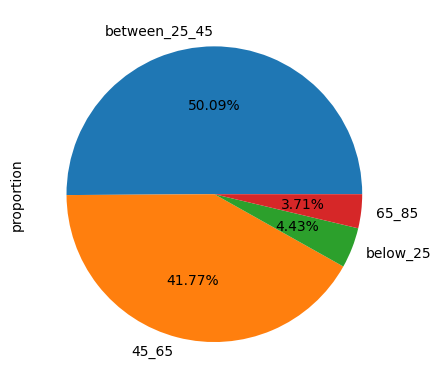

In [149]:
app_df['AGE_category'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.show()

# **DATA IMBLACE CHECK**

In [150]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AMT_CREDIT_category,AGE_category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,1,10,5,3,low_credit,between_25_45
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,47,3,3,0,2,NaN,45_65
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,0,11,7,2,NaN,45_65
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,8,27,6,1,very_low_credit,45_65
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9,3,low_credit,45_65


DIVING APPLICATION DATASET WITH TARGET VARIBLE AS 0 AND 1

In [151]:
tar_0 = app_df[app_df.TARGET == 0 ]
tar_1 = app_df[app_df.TARGET == 1 ]

In [152]:
app_df.TARGET.value_counts(normalize=True)*100

,proportion
TARGET,
0,91.927118
1,8.072882


# **UNIVARATE ANALYSIS**

In [153]:
cat_cols = list(app_df.columns[app_df.dtypes == object])
num_cols = list(app_df.columns[app_df.dtypes == 'int64']) + list(app_df.columns[app_df.dtypes==np.float64])

In [154]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [155]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL'

NAME_CONTRACT_TYPE
Cash loans         90.478715
Revolving loans     9.521285
Name: proportion, dtype: float64


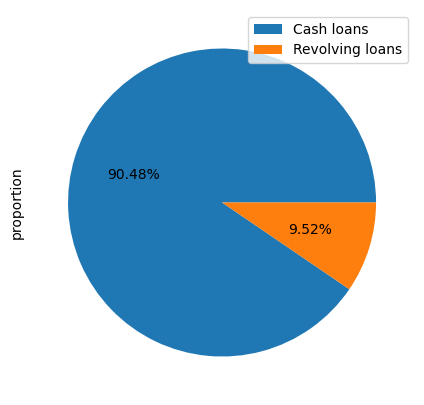

CODE_GENDER
F      65.834393
M      34.164306
XNA     0.001301
Name: proportion, dtype: float64


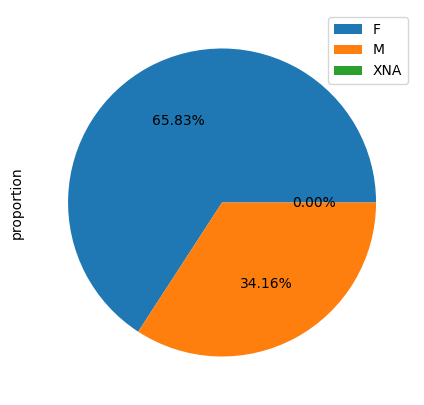

FLAG_OWN_CAR
N    65.989184
Y    34.010816
Name: proportion, dtype: float64


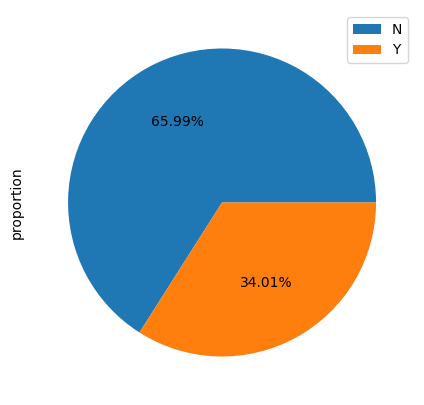

FLAG_OWN_REALTY
Y    69.367275
N    30.632725
Name: proportion, dtype: float64


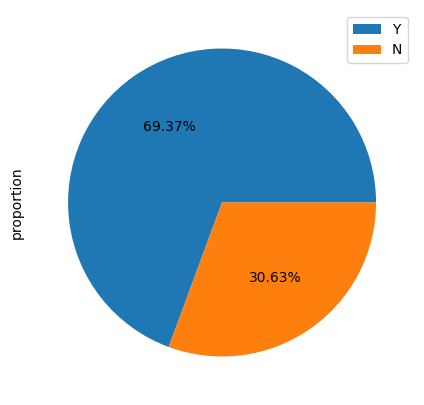

NAME_TYPE_SUITE
Unaccompanied      81.238720
Family             13.056118
Spouse, partner     3.697429
Children            1.062401
Other_B             0.575589
Other_A             0.281616
Group of people     0.088127
Name: proportion, dtype: float64


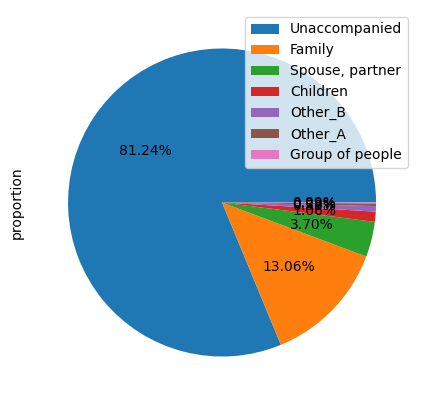

NAME_INCOME_TYPE
Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: proportion, dtype: float64


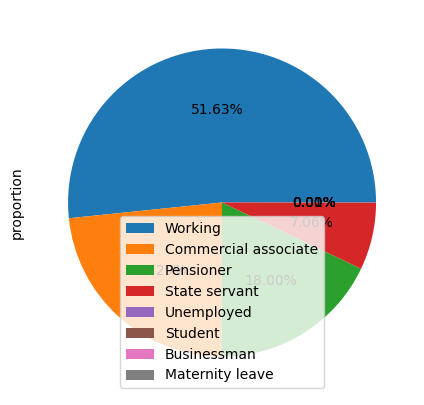

NAME_EDUCATION_TYPE
Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: proportion, dtype: float64


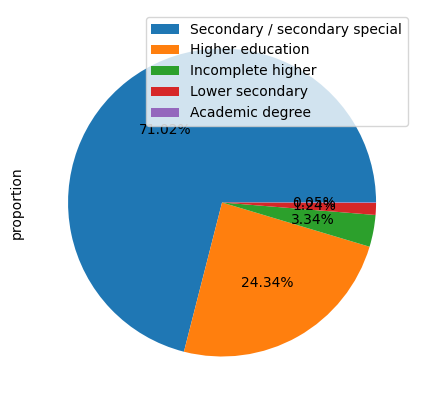

NAME_FAMILY_STATUS
Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: proportion, dtype: float64


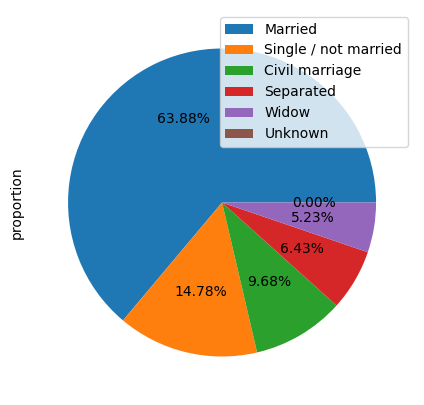

NAME_HOUSING_TYPE
House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: proportion, dtype: float64


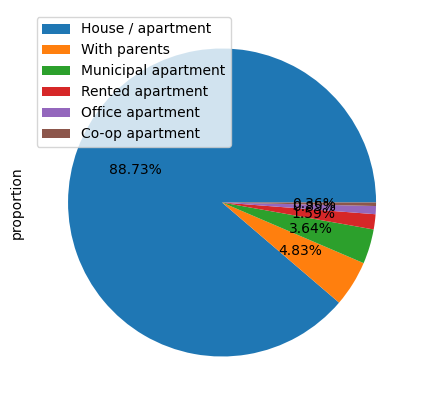

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64


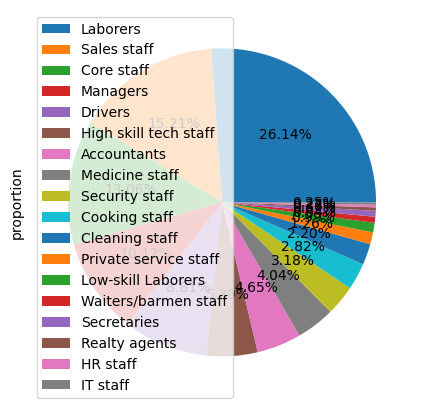

WEEKDAY_APPR_PROCESS_START
TUESDAY      17.528153
WEDNESDAY    16.888502
MONDAY       16.491768
THURSDAY     16.451769
FRIDAY       16.369496
SATURDAY     11.008387
SUNDAY        5.261926
Name: proportion, dtype: float64


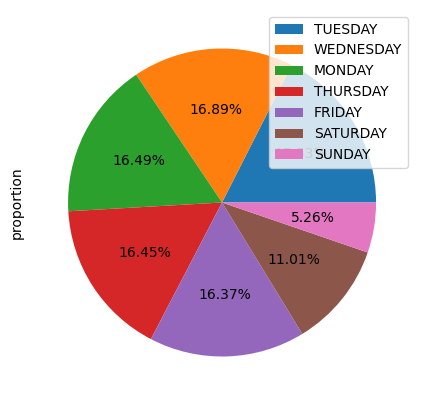

ORGANIZATION_TYPE
Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant

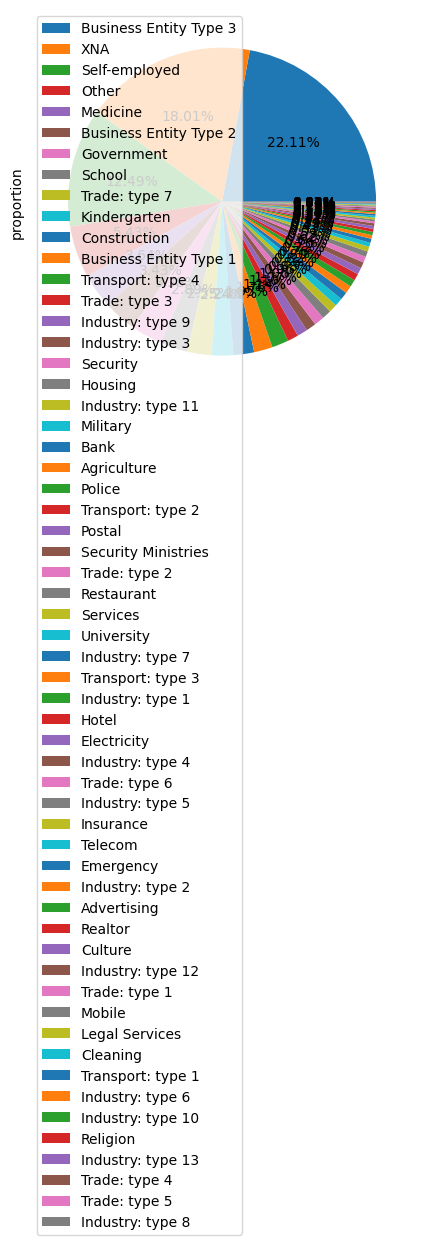

In [156]:
for col in cat_cols:
  print(app_df[col].value_counts(normalize=True)*100)
  plt.figure(figsize=[5,5])
  app_df[col].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
  plt.legend()
  plt.show()

Conclusion >> Insights on below columns
1. NAME CONTRACT TYPE-More application have Cash loans than Revolving loans
2 CODE GENDER-Number of Female applicants are twice than that of male applicants
3 FLAG OWN CAR-Most(70%) of the applicants do not own a car
4. FLAG OWN_REALTY-Most(70%) of the applicants do not own a house
5. NAME TYPE SUITE Most(81%) of the applicants are Unaccompanied
6. NAME INCOME TYPE-Most(51%) of the applicants are eaming their income from Work
7. NAME EDUCATION TYPE-71% of the applicants have completed Secondary/secondary special education
B NAME FAMILY STATUS-63% of the applicants are mamed
9. NAME HOUSING TYPE-88% of the housing type of applicants are House/apartment
10. OCCUPATION TYPE- Most(31%) of the applicants have other Occupation type
11. WEEKDAY APPR PROCESS START- Most of the applicant have applied the loan on Tuseday
12. ORGANIZATION TYPE - Most of the Organization type of employees are Business Entity Type 3

# **plot on numerical columns**
Categorizing columns with and without flags

In [157]:
num_cols_withoutflag = []
num_cols_withflag = []
for col in num_cols:
  if col.startswith('FLAG'):
      num_cols_withflag.append(col)
  else:
      num_cols_withoutflag.append(col)

In [158]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [159]:
num_cols_withoutflag

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


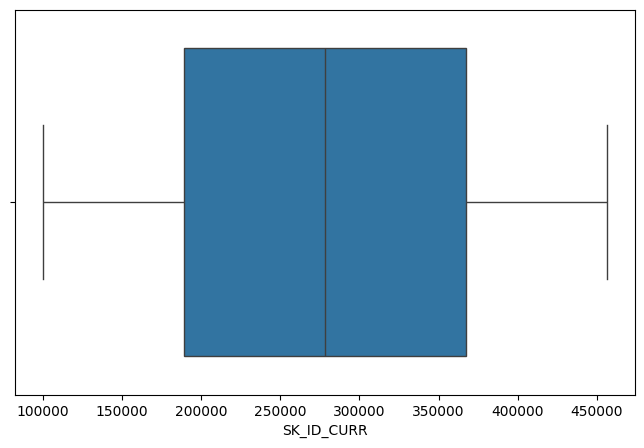

------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


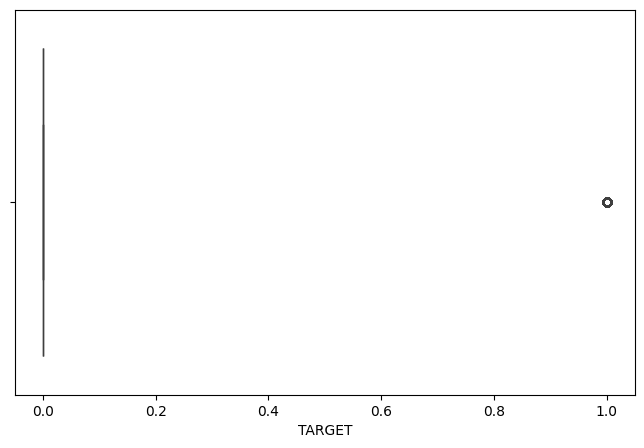

------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


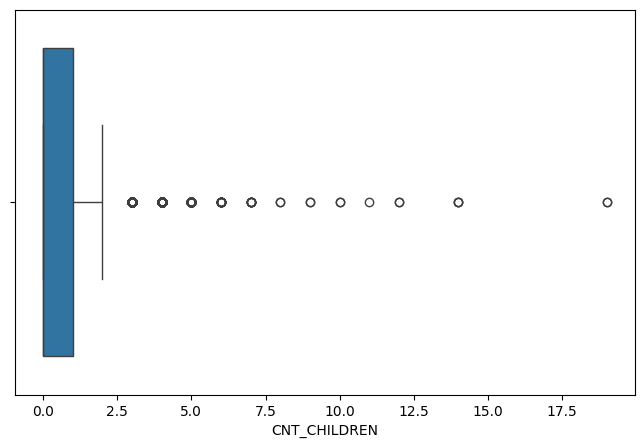

------------
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


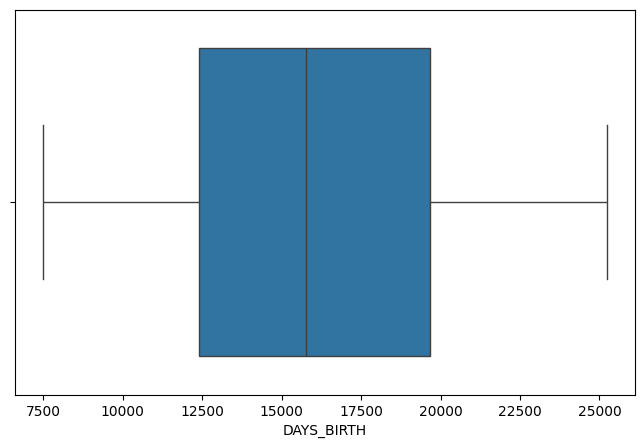

------------
count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


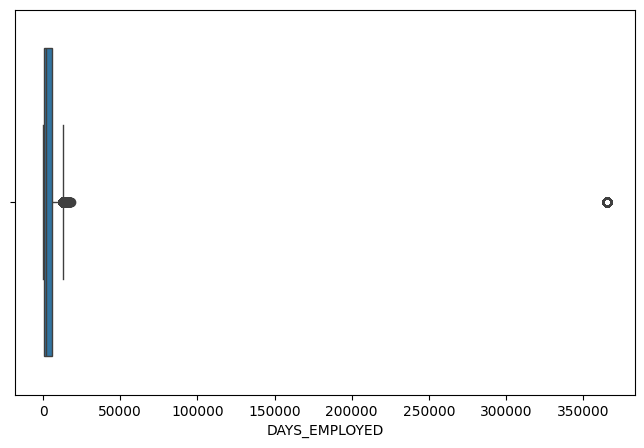

------------
count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


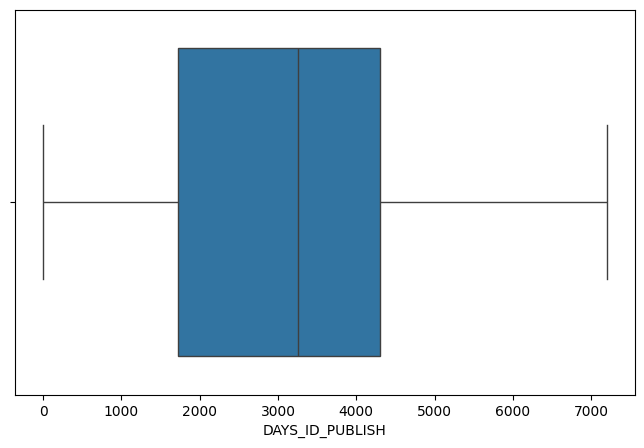

------------
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


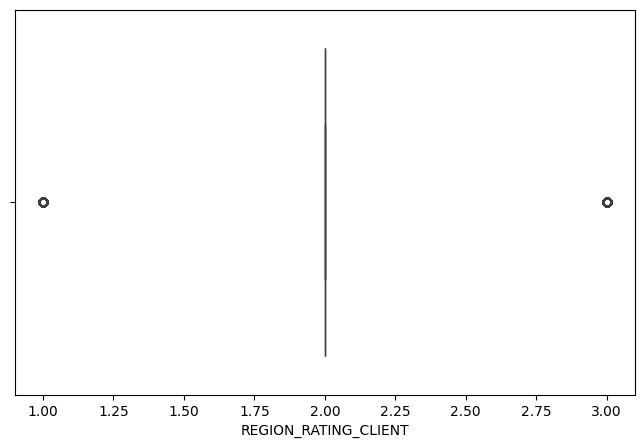

------------
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


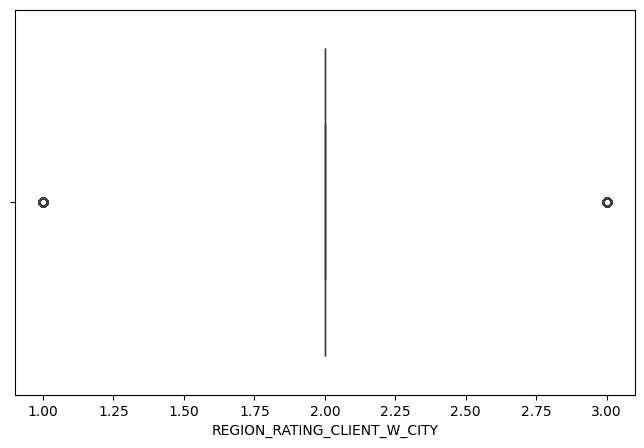

------------
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


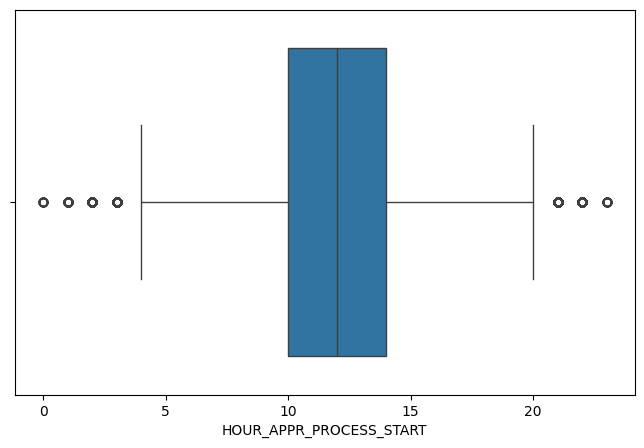

------------
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


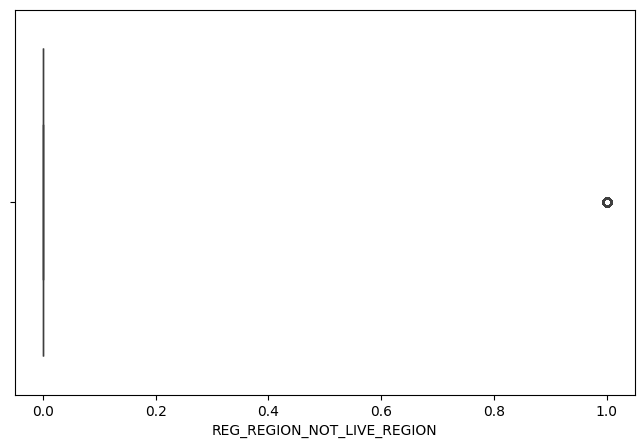

------------
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


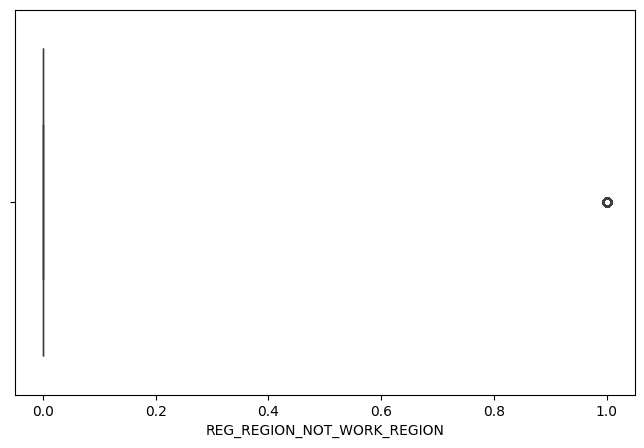

------------
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


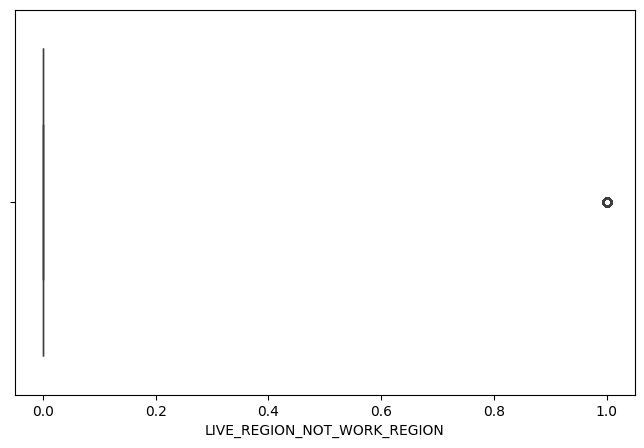

------------
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


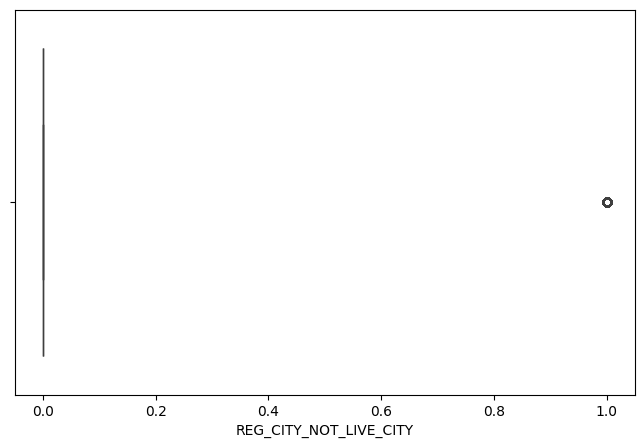

------------
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


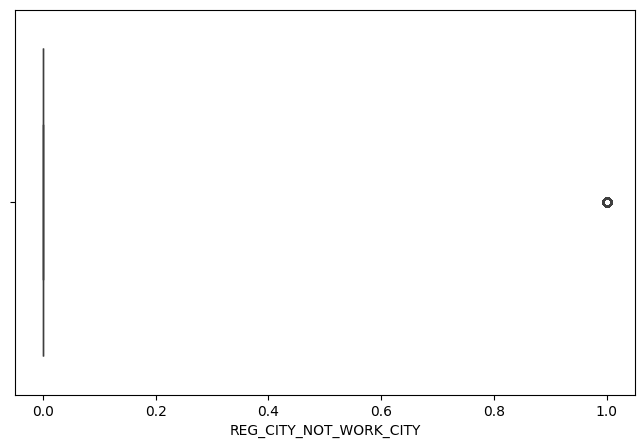

------------
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


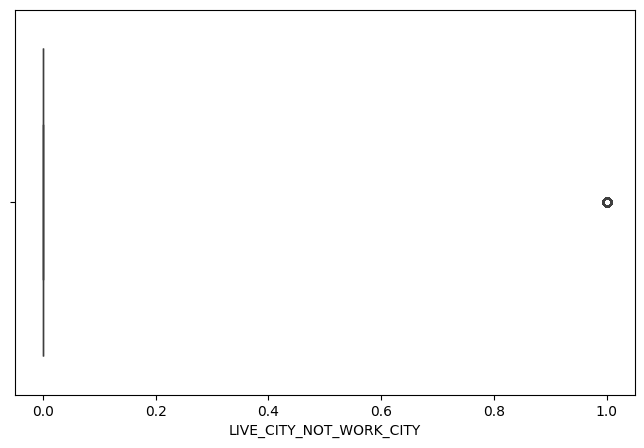

------------
count    307511.000000
mean         44.548992
std          12.263409
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: YEARS_BIRTH, dtype: float64


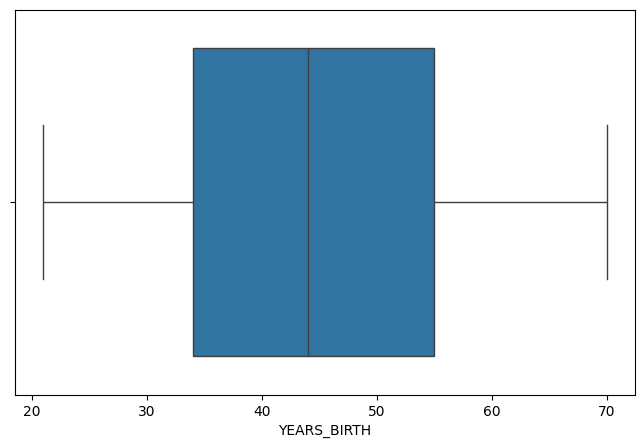

------------
count    307511.000000
mean        189.656025
std         391.517218
min           0.000000
25%           2.000000
50%           6.000000
75%          16.000000
max        1025.000000
Name: YEARS_EMPLOYED, dtype: float64


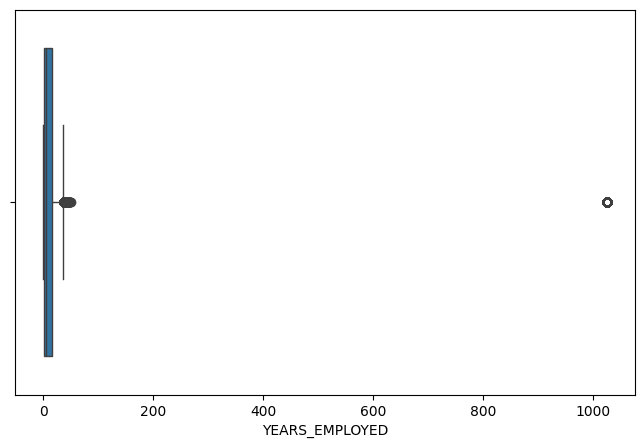

------------
count    307511.000000
mean         13.513478
std           9.891137
min           0.000000
25%           5.000000
50%          12.000000
75%          21.000000
max          69.000000
Name: YEARS_REGISTRATION, dtype: float64


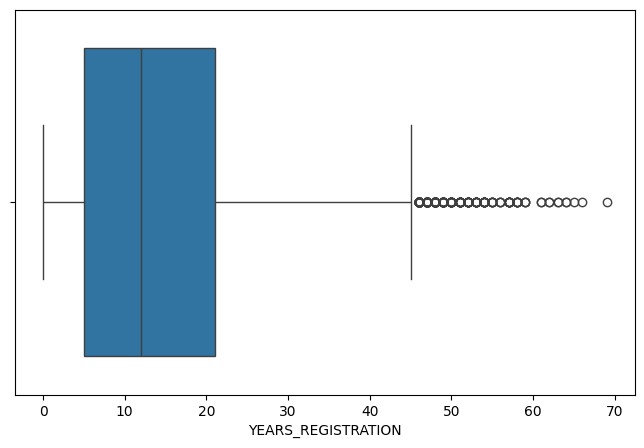

------------
count    307511.000000
mean          7.920845
std           4.238167
min           0.000000
25%           4.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: YEARS_ID_PUBLISH, dtype: float64


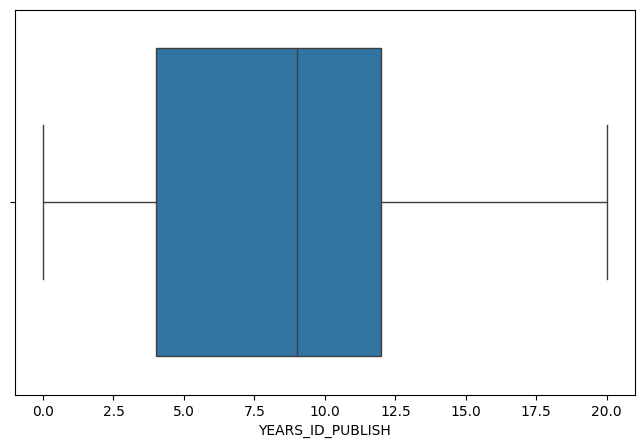

------------
count    307511.000000
mean          2.293102
std           2.249671
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          12.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


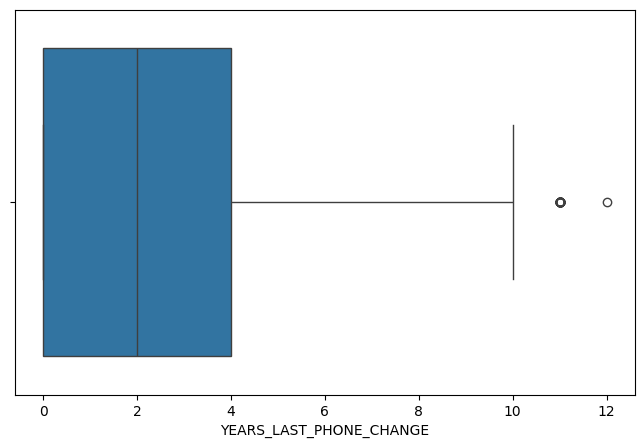

------------
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


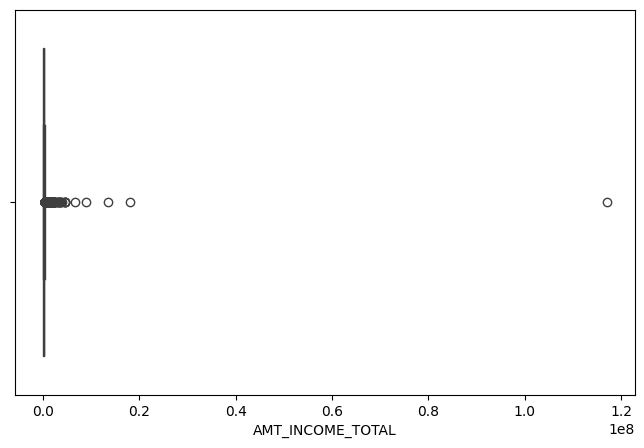

------------
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


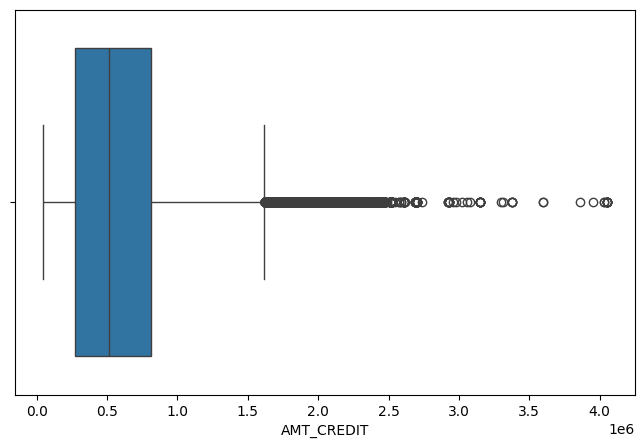

------------
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


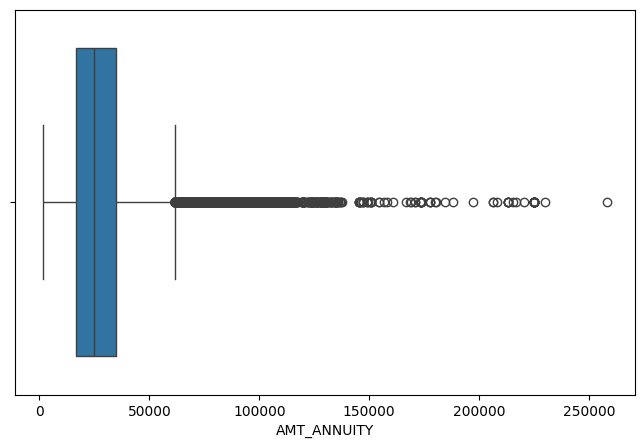

------------
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


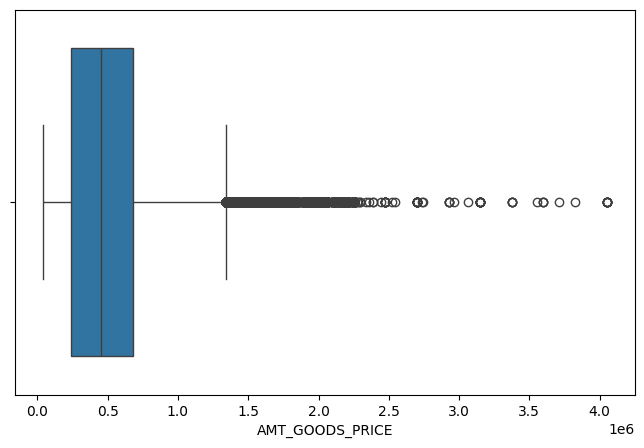

------------
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


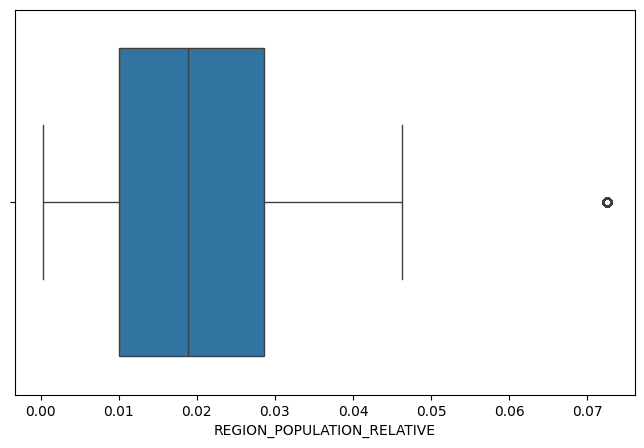

------------
count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


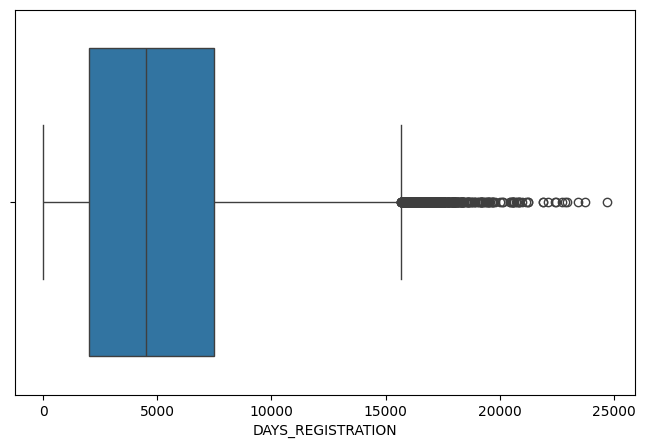

------------
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


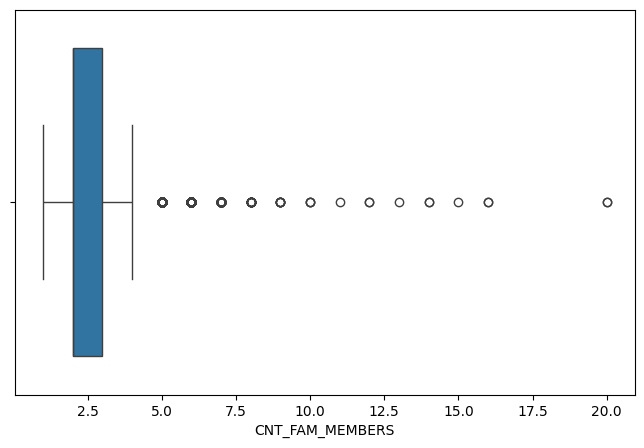

------------
count    3.075110e+05
mean     5.144375e-01
std      1.908575e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.654672e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


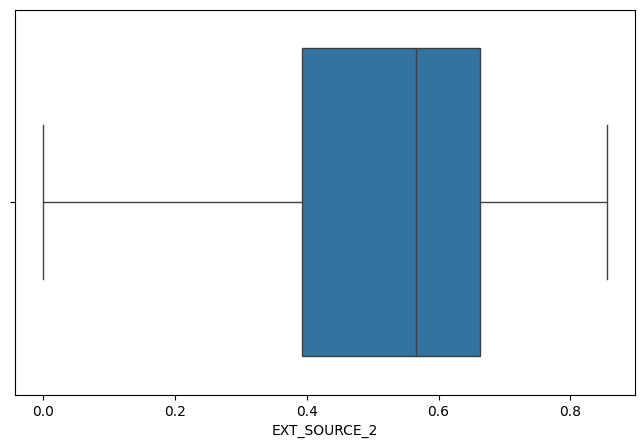

------------
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


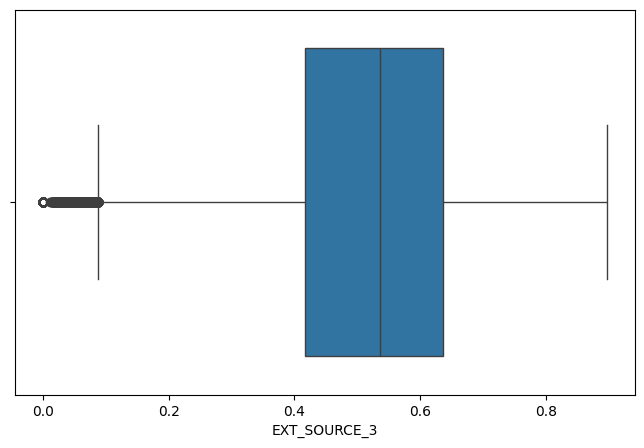

------------
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


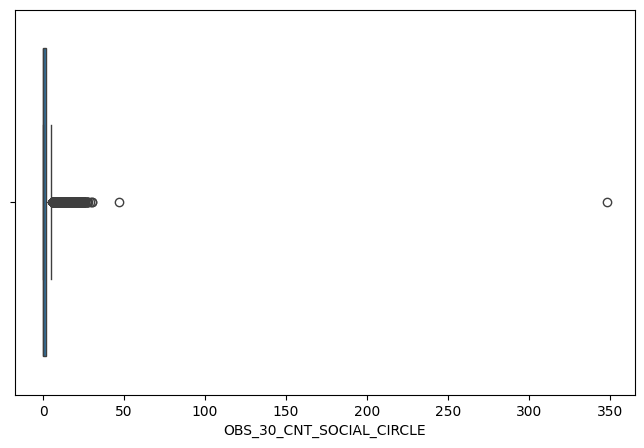

------------
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


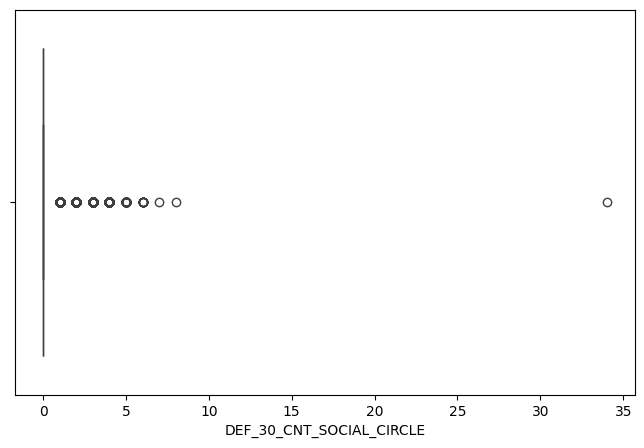

------------
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


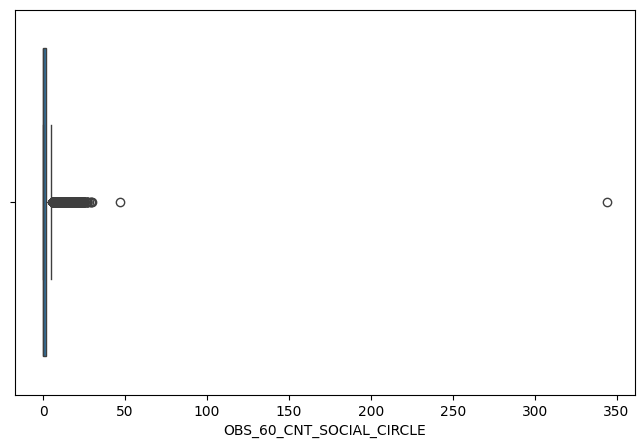

------------
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


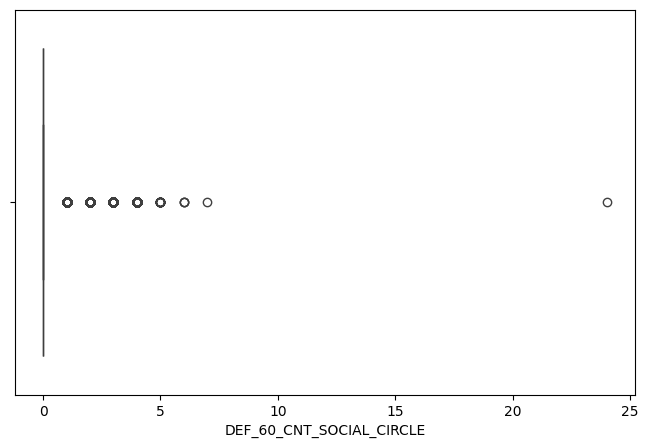

------------
count    307511.000000
mean        962.858119
std         826.807226
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


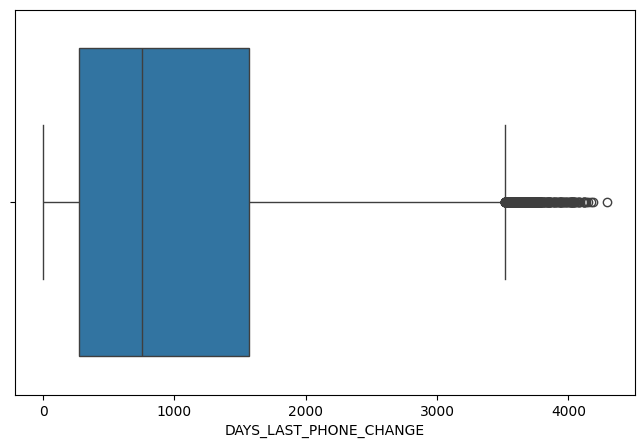

------------
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


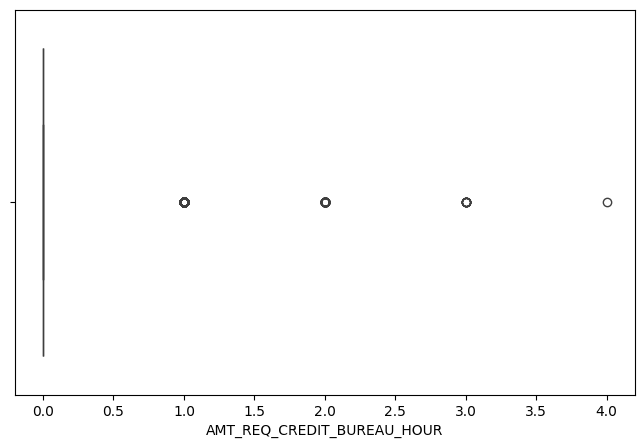

------------
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


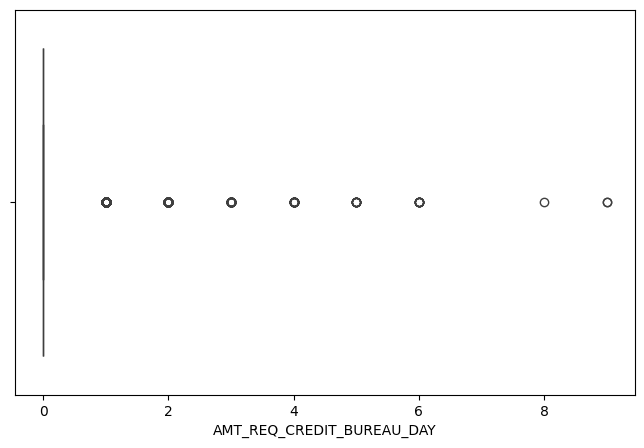

------------
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


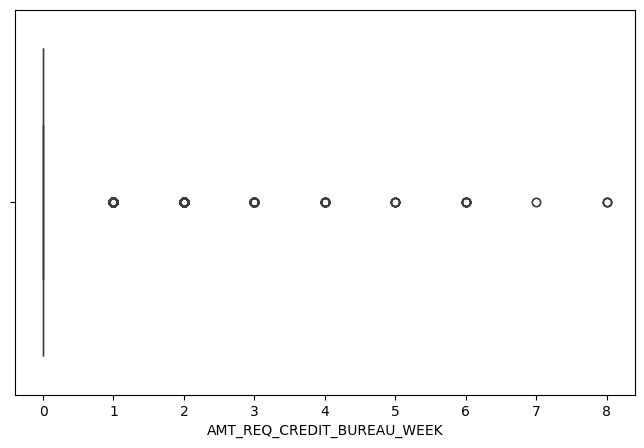

------------
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


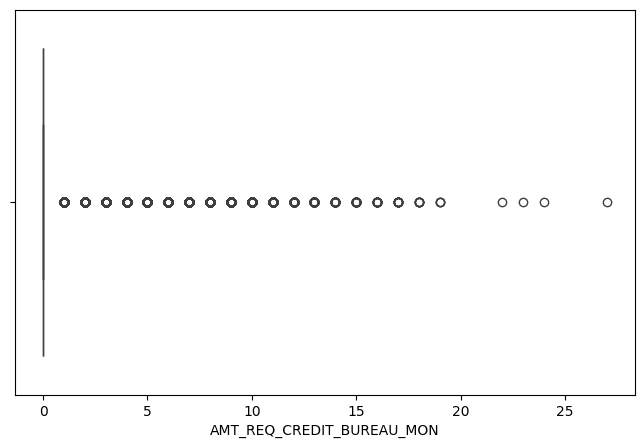

------------
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


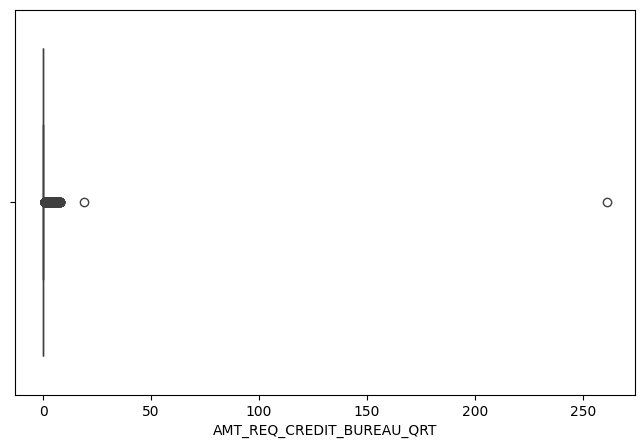

------------
count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


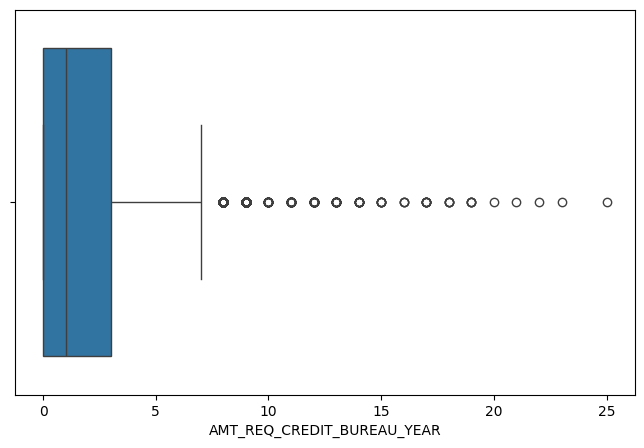

------------


In [160]:
for col in num_cols_withoutflag:
  print(app_df[col].describe())
  plt.figure(figsize=[8,5])
  sns.boxplot(data=app_df,x=col)
  plt.show()
  print('------------')


Conclusion >> Few Columns are with outliers are below
1. AMT_INCOME TOTAL Column has a few outllers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers
2. AMT CREDIT Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers
3. AMT ANNUITY Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers
4. AMT GOODS_PRICE Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers
5 REGION POPULATION_RELATIVE Column has a one outliers and there not much difference between mean and median

# **Univariate analysis on coloumns with target 0 and 1**

plot for NAME_CONTRACT_TYPE for target 0 and 1 


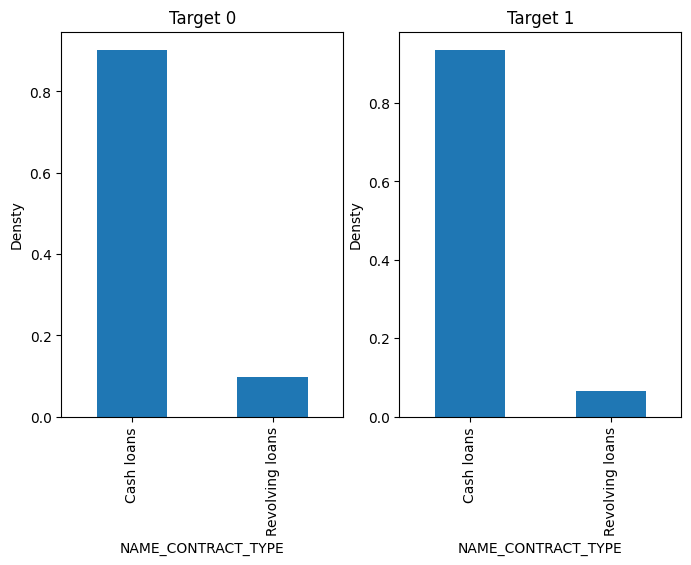



----------------------------------------


plot for CODE_GENDER for target 0 and 1 


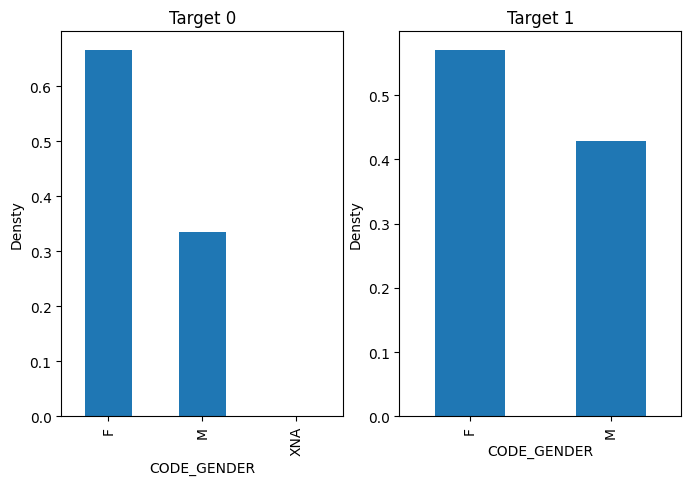



----------------------------------------


plot for FLAG_OWN_CAR for target 0 and 1 


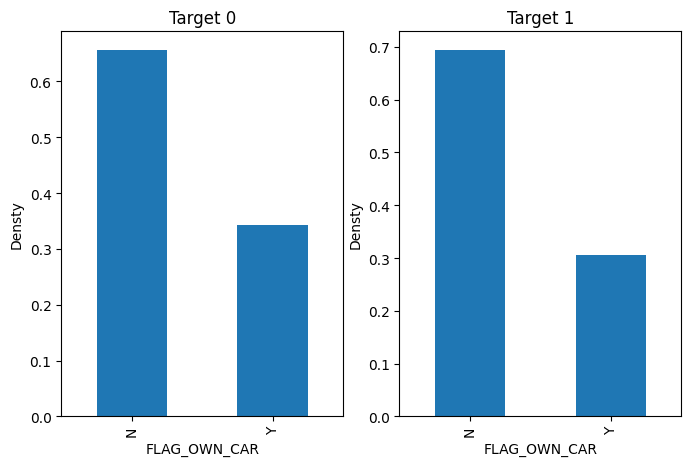



----------------------------------------


plot for FLAG_OWN_REALTY for target 0 and 1 


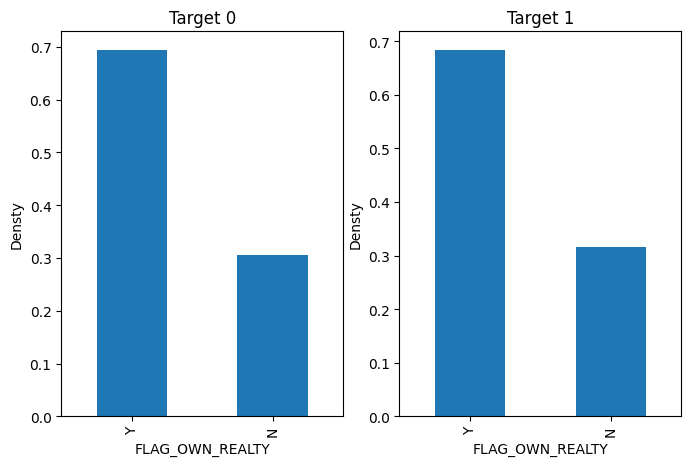



----------------------------------------


plot for NAME_TYPE_SUITE for target 0 and 1 


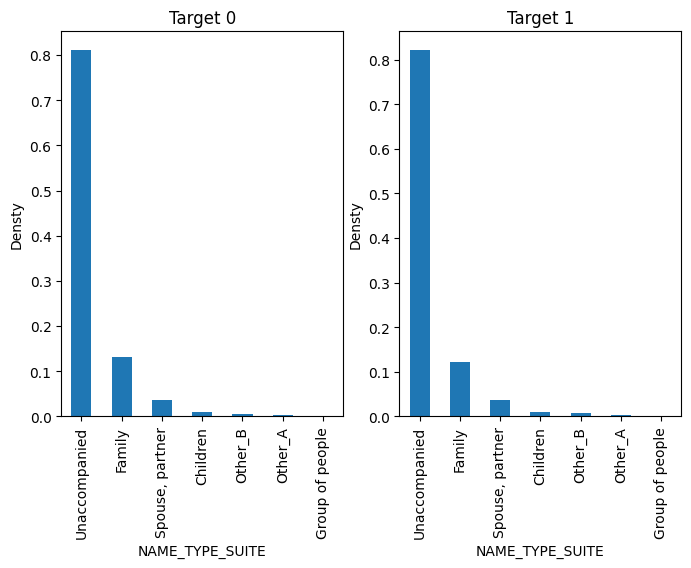



----------------------------------------


plot for NAME_INCOME_TYPE for target 0 and 1 


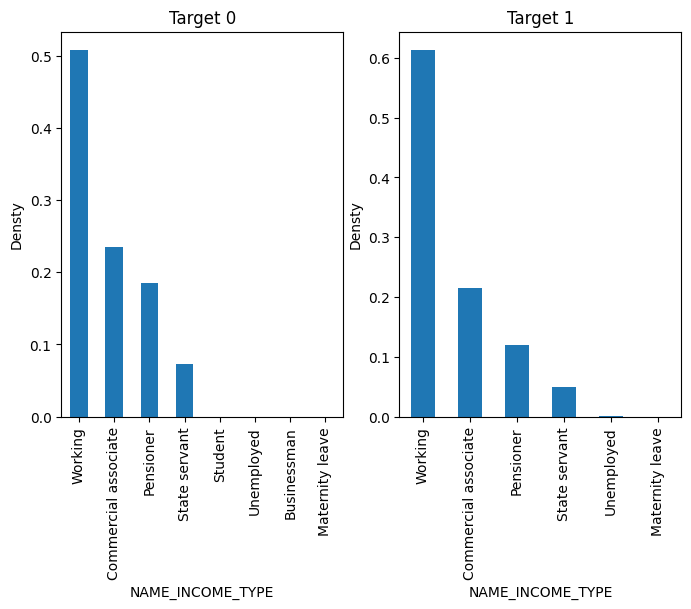



----------------------------------------


plot for NAME_EDUCATION_TYPE for target 0 and 1 


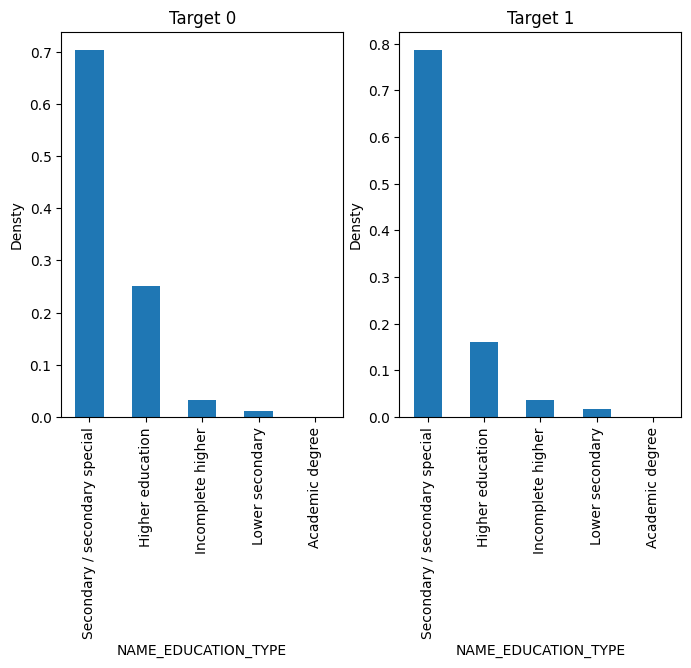



----------------------------------------


plot for NAME_FAMILY_STATUS for target 0 and 1 


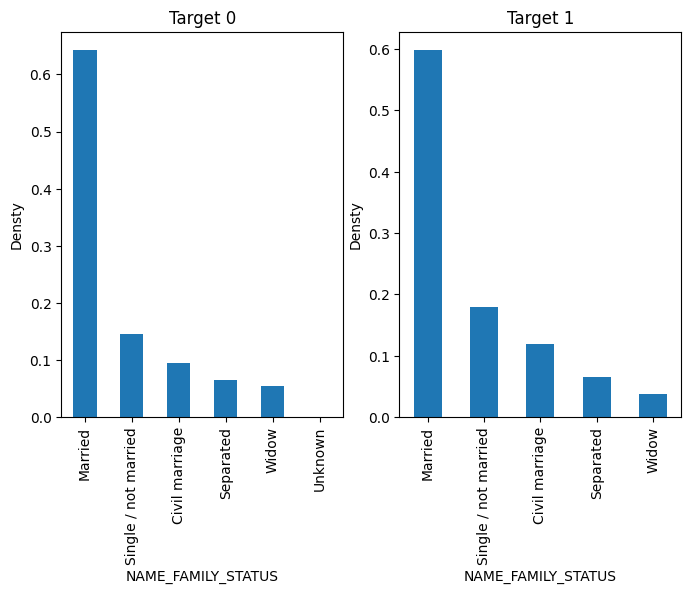



----------------------------------------


plot for NAME_HOUSING_TYPE for target 0 and 1 


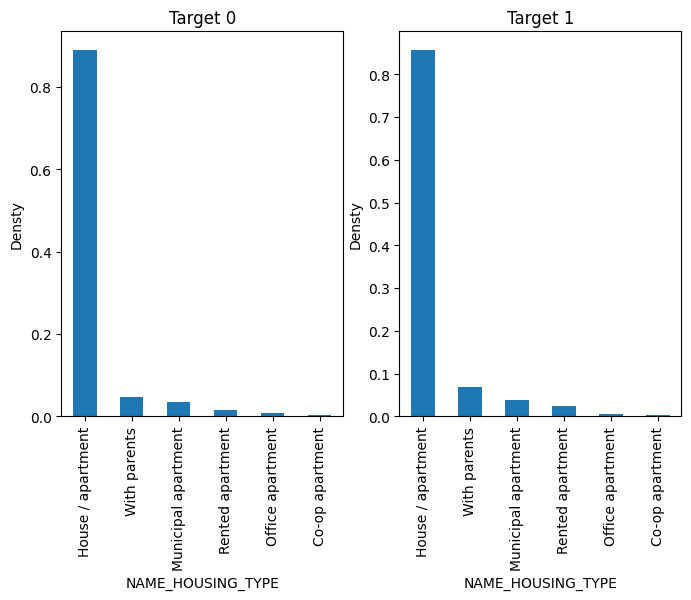



----------------------------------------


plot for OCCUPATION_TYPE for target 0 and 1 


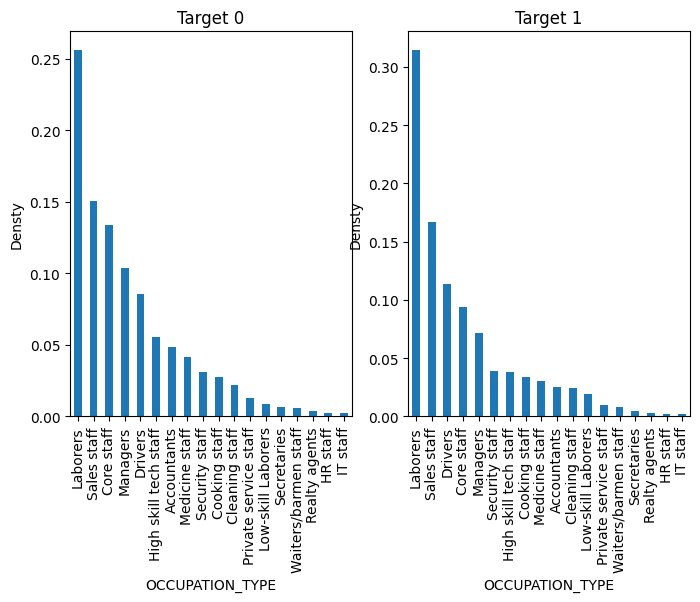



----------------------------------------


plot for WEEKDAY_APPR_PROCESS_START for target 0 and 1 


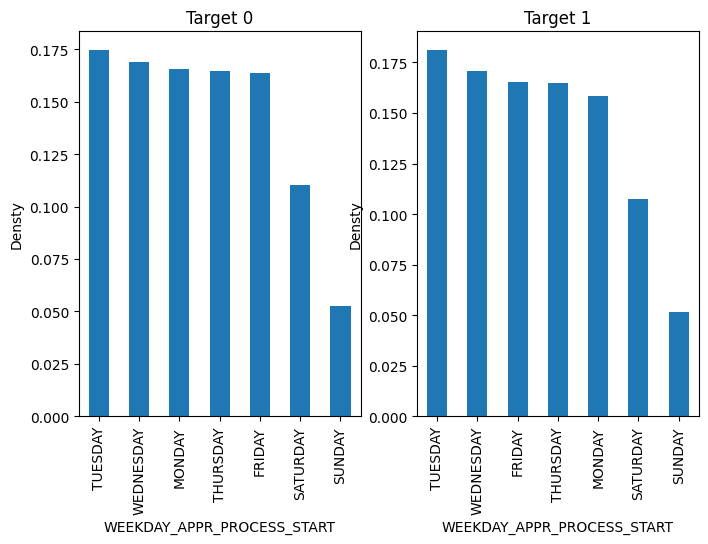



----------------------------------------


plot for ORGANIZATION_TYPE for target 0 and 1 


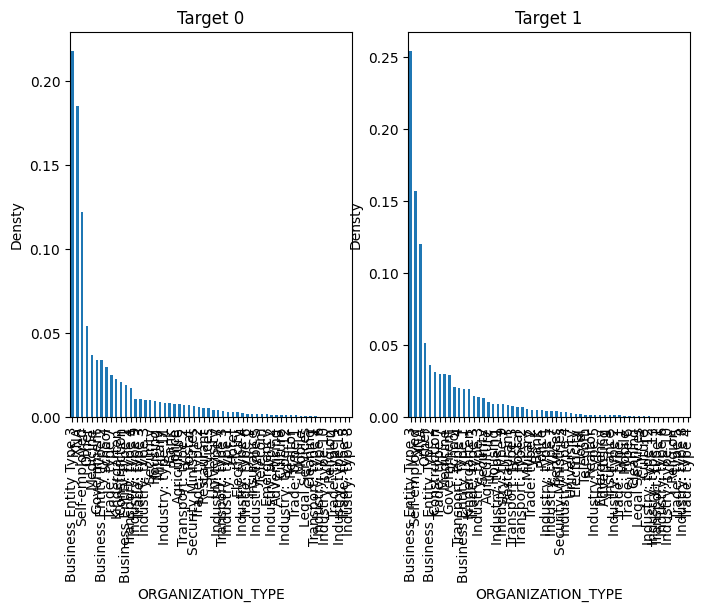



----------------------------------------




In [161]:
for col in cat_cols:
  print(f"plot for {col} for target 0 and 1 " )
  plt.figure(figsize=[8,5])
  plt.subplot(1,2,1)
  tar_0[col].value_counts(normalize=True).plot.bar()
  plt.title('Target 0')
  plt.xlabel(col)
  plt.ylabel('Densty')
  plt.subplot(1,2,2)
  tar_1[col].value_counts(normalize=True).plot.bar()
  plt.title('Target 1')
  plt.xlabel(col)
  plt.ylabel('Densty')
  plt.show()
  print("\n\n----------------------------------------\n\n")

Conclusion Below are the column insights
1. NAME CONTRACT TYPE- The Applicants are receiving more of Cash loans than Revolving loans both for Target 0 and 1
2. CODE GENDER Number of Female applicants are twice than that of male applicants both for Target 0 and 1
3. FLAG_OWN_CAR-Most(70%) of the applicants do not own a car both for Target 0 and 1
4. FLAG_OWN_REALTY-Most(70%) of the applicants do not own a house both for Target 0 and 1
5. NAME TYPE SUITE-Most(81%) of the applicants are Unaccompanied both for Target 0 and 1
6. NAME INCOME TYPE-For both Target 0 and 1, Most(51%) of the applicants are earning their income from Work
7. NAME EDUCATION TYPE-For both Target 0 and 1, almost 71% of the applicants have completed Secondary/secondary special education
8 NAME FAMILY STATUS-63% of the applicants are married for both Target 0 and 1
9. NAME HOUSING TYPE-88% of the housing type of applicants are House/apartment for both Target 0 and 1
10. OCCUPATION TYPE-Most(31%) of the applicants have other Occupation type, are non defaulters and Laborere, Sales staff Orivers and core staff are not able to repay the loan on time
11 WEEKDAY APPR_PROCESS_START-Most of the applicant have appted the loan on Tuseday and the least on Sunday
12. ORGANIZATION TYPE-Most of the Applicants are working in Business Entity Type 3, Self Employed and other Organization type

# **ANALYSIS ON AMT_GOODS_PRICE on target 0 to 1**

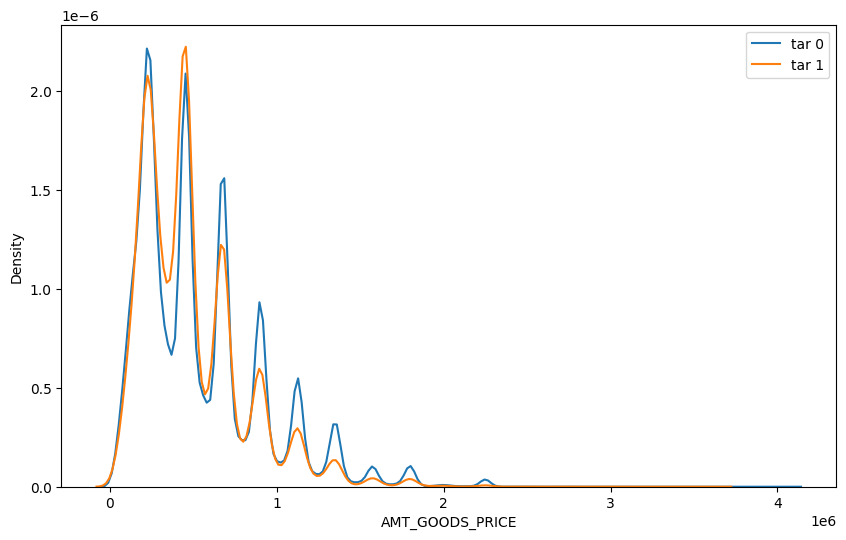

In [162]:
plt.figure(figsize=(10,6))
sns.distplot(tar_0['AMT_GOODS_PRICE'], label='tar 0', hist=False)
sns.distplot(tar_1['AMT_GOODS_PRICE'], label='tar 1', hist=False)
plt.legend()
plt.show()

Consclusion. The price of the goods for which loan is given has the same variation for Target 0 and 1

Bivariate and Multivariate Analysis
# Bivariate Analysis between WEEKDAY_APPR_PROCESS_START vs HOUR_APPR_PROCESS_START **bold text**

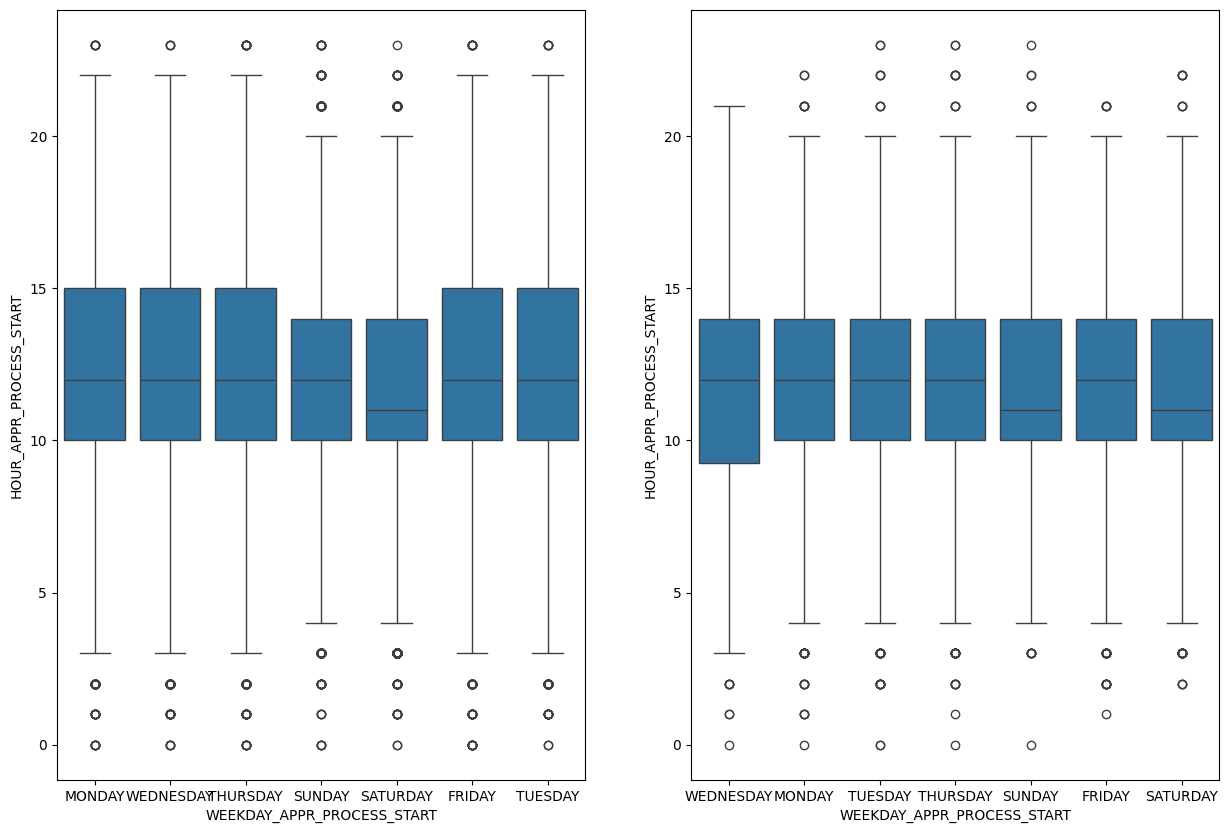

In [163]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data=tar_0,x='WEEKDAY_APPR_PROCESS_START',y= 'HOUR_APPR_PROCESS_START')
plt.subplot(1,2,2)
sns.boxplot(data=tar_1,x='WEEKDAY_APPR_PROCESS_START',y= 'HOUR_APPR_PROCESS_START')
plt.show()

Conclusion >>
1. The Bank operates between 10am to 3pm except for Saturday and Sunday, its between 10am to 2pm
2. We can observe that around 11:30am to 12pm around 50% of Customers visit the branch for loan application on all the days except for Saturday where the time is between 10am to 11am for both Target 0 and 1
3. The loan defaulters have applied for the loan between 9:30am-10am and 2pm where as the applicants who repay the loan on time have applied for the loan between 10am to 3pm
# **Bivariate Analysis between AGE CATEGORY VS AMT_CREDIT**

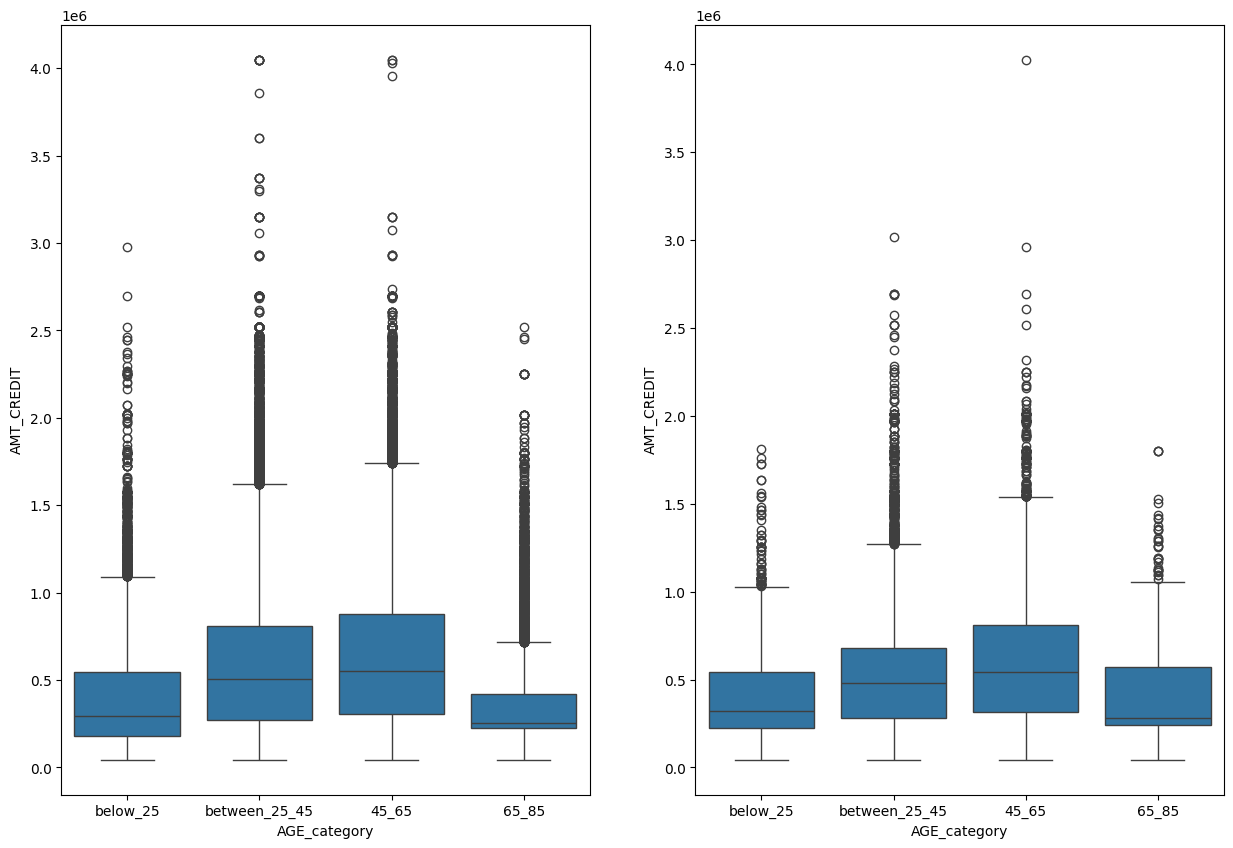

In [164]:
tar_0['AGE_category']= pd.cut(tar_0.YEARS_BIRTH,[0,25,45,65,85],labels=['below_25','between_25_45','45_65','65_85'])
tar_1['AGE_category']= pd.cut(tar_1.YEARS_BIRTH,[0,25,45,65,85],labels=['below_25','between_25_45','45_65','65_85'])

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data=tar_0,x='AGE_category',y= 'AMT_CREDIT')
plt.subplot(1,2,2)
sns.boxplot(data=tar_1,x='AGE_category',y= 'AMT_CREDIT')
plt.show()

Conclusion>>
1. The applicants between age group 25 to 65 have Credit amount of the loan less than 2500000 and are able to repay the loan property
2. The applicants with less than 100000 Credit amount are with age group greater than 65 may be considered as loan defaulters
3. Most applicants who have Credit amount of the loan less than 1700000 are loan defaulters with 25 and less age
# **Pair Plot of Amount Columns for Target 0**

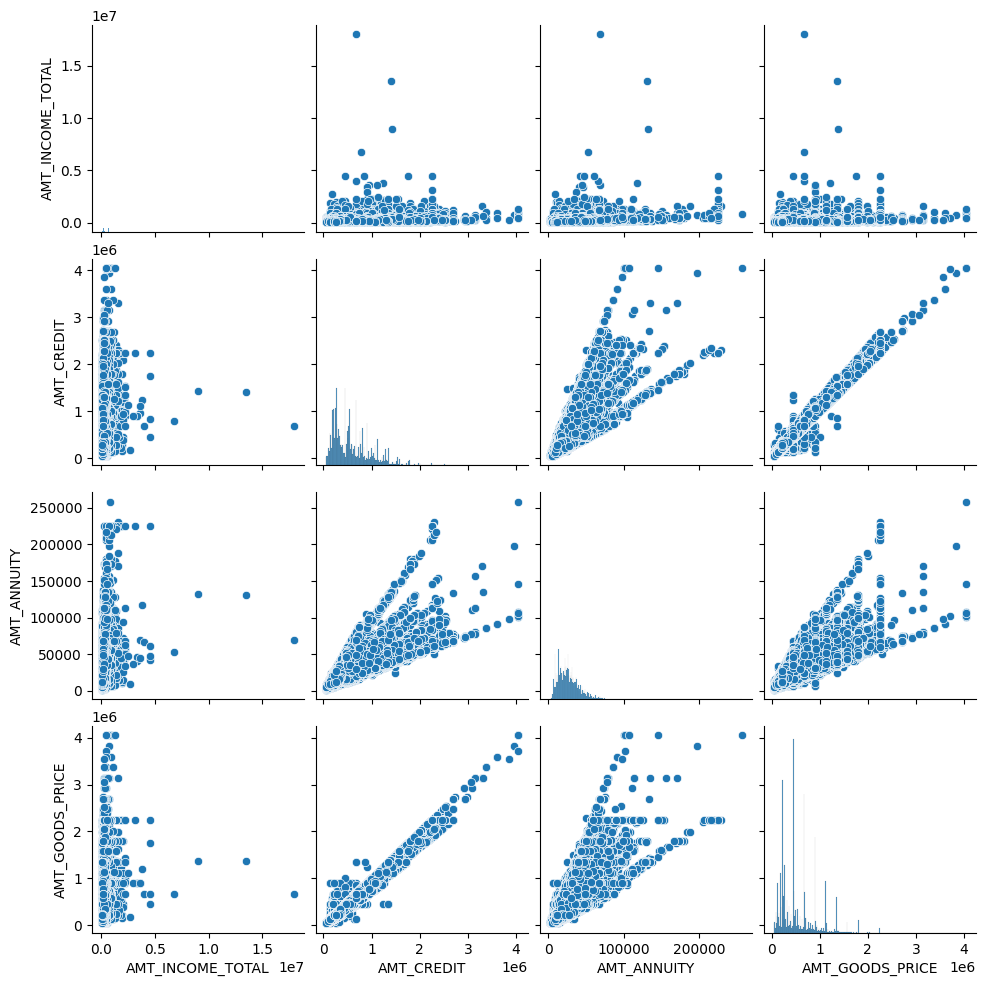

In [165]:
sns.pairplot(tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])
plt.show()

# **Pair Plot of Amount Columns for Target 1**

In [ ]:
sns.pairplot(tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])
plt.show()

Conclusion>>
For Applicants who are unable to replay the loan on time
1 AMT CREDIT Increases or vanes linearly with AMT_GOODS_PRICE and AMT CREDIT Increases with AMT_ANNUITY
2. AMT ANNUITY Increases with Increases in AMT_GOODS_PRICE and AMT Credit
3 AMT_GOODS_PRICE increases with Increases in AMT Credit and AMT ANNUITY
4 AMT INCOME TOTAL has a drastic Increase with slight increase in AMT CREDIT AMT_ANNUITY AMT_GOODS_PRICE

# **CO RELATION BW NUMERICAL COLUMNS**

In [ ]:
corr_data = app_df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION",'YEARS_ID_PUBLISH']].corr()
corr_data.head()

In [ ]:
corr_data.corr()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.show()

Conclusion >>
1. AMT INCOME TOTAL-It has a positive corelation index of 0.16.0 19.0.16 with AMT CREDIT AMT ANNUITY AMT_GOODS_PRICE respectively
2. AMT CREDIT-is has negative coreltaion index of 0.064 with YEARS_EMPLOYED and positive coreftaion index of 0.99,0.77 with AMT_GOODS_PRICE AMT ANNUITY respectively
3. AMT ANNUITY is has negative coreftaion index of 0.1 with YEARS_EMPLOYED and positive coreltaion index of 0.77 with AMT_CREDIT
4. AMT GOODS_PRICE It has a positive corelation with AMT CREDIT,AMT_ANNUITY
5. YEARS BIRTH-It has a positive corelation with YEARS_EMPLOYED, AMT_GOODS PRICE and negative coreitaion with AMT ANNUITY AMT_INCOME_TOTAL
6 YEARS EMPLOYED-is has negative coreltaion index of 0.1 with AMT ANNUITY and has a positive corelation with YEARS REGISTRATION, YEARS ID PUBLISH
7. YEARS REGISTRATION-It has a positive corelation with YEARS_ID_PUBLISH YEARS_BIRTH, YEARS_EMPLOYED
& YEARS_ID_PUBLISH-It has a positive corelation with YEARS REGISTRATION and negative coreitaion with AMIT_INCOME_TOTAL AMT ANNUITY
9. YEARS LAST_PHONE CHANGE - It has negative coreltaion with YEARS EMPLOYED and positive coresation with AMT_GOODS_PRICE YEARS ID PUBLISH

# **SPLIT THE NUMERICAL VARIABLE BASED ON TARGET 0 OR 1 TO FIND THE CO RELATION**

In [ ]:
corr_data_0 = tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION",'YEARS_ID_PUBLISH']].corr()
corr_data_0.head()

In [ ]:
corr_data_1 = tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION",'YEARS_ID_PUBLISH']].corr()
corr_data_1.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0, annot=True, cmap='coolwarm')
plt.show()

Conclusion>>
1. AMT INCOME TOTAL-It has a positive corelation index of 0.34.0.42.0.35 with AMT CREDIT,AMT_ANNUITY AMT_GOODS_PRICE respectively and Negative with most of the other Year columns
2. AMT CREDIT-is has a strong positive coreitaion index of 0.99.0.77 with AMT_GOODS_PRICE, AMT_ANNUITY respectively
3. AMT ANNUITY -is nas positive coreltaion index of 0.77,0.78 with AMT_CREDIT AMT_GOODS_PRICE respectively and Negative with most of the other Year columns
4. AMT_GOODS PRICE-It has a strong positive corelation index 0.78,0 99 with AMT ANNUITY, AMT_CREDIT

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_1, annot=True, cmap='coolwarm')
plt.show()

Conclusion>>
1. AMT INCOME TOTAL-It is less correlated with AMT CREDIT AMT_ANNUITY AMT_GOODS PRICE respectively
2. AMT CREDIT-Is has a strong positive coreltaion index of 0.58,0.75 with AMT_GOODS_PRICE, AMT_ANNUITY respectively and also positive corelation with other Year Columns
3. AMT ANNUITY-is nas positive coreltaion index of 0.75 with AMT CREDITAMT_GOODS_PRICE and Negative with
YEAR EMPLOYED YEAR_REGISTRATION
4. AMT GOODS PRICE-It has a strong positive corelation index 0,75,0.96 with AMT ANNUITY, AMT_CREDIT and weak positive corelation with other Year columns

# **READ PRRVIOUS APPLICATION CSV**

In [ ]:
papp_data=pd.read_csv('/content/previous_application.csv')
papp_data.head()

In [ ]:
papp_data.info()

In [ ]:
papp_data.shape

# **DATA QUALITTY CHECK**

In [ ]:
papp_data.isnull().mean()*100

# **Binnings Of Continous Variables**
Binning AMT_Credit_columns

In [ ]:
papp_data.AMT_CREDIT.describe()

In [ ]:
papp_data['AMT_CREDIT_category'] = pd.cut(papp_data.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],labels=['very_low_credit', 'low_credit','medium_credit','high_credit','very_high_credit'])

In [ ]:
papp_data['AMT_CREDIT_category'].value_counts(normalize=True).plot.bar()

In [ ]:
q = [0,0.25,0.45,0.65,0.85,1]
labels = ["Very low Price", "Low Price", "Medium Price", "High Price", "Very-high price"]
papp_data['AMT_GOODS_PRICE_category'] = pd.qcut(papp_data.AMT_GOODS_PRICE, q=q, labels=labels, duplicates='drop')

In [ ]:
papp_data["AMT_GOODS_PRICE_category"].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

# **Data Imbalance Check**
Dividing Application Dataset with NAME CONTRACT_STATUS

In [ ]:
approved_papp = papp_data[papp_data['NAME_CONTRACT_STATUS'] == 'Approved']
cancelled_papp = papp_data[papp_data['NAME_CONTRACT_STATUS'] == 'Canceled']
refused_papp = papp_data[papp_data['NAME_CONTRACT_STATUS'] == 'Refused']
unused_papp = papp_data[papp_data['NAME_CONTRACT_STATUS'] == 'Unused offer']

In [ ]:
papp_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

In [ ]:
papp_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

Conclusion 62% of the Applicants have the loan approved, 19%, 17% applicants are rejected or canceled and 2% are unused
# **Univariate Analysis**


In [ ]:
cat_cols = list(papp_data.select_dtypes(include=['object']).columns)
num_cols = list(papp_data.select_dtypes(include=['int64', 'float64']).columns)

In [ ]:
cat_cols

In [ ]:
num_cols

In [ ]:
cat_cols = ["NAME_CONTRACT_TYPE", "WEEKDAY_APPR_PROCESS_START", "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE", "NAME_CLIENT_TYPE", "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE", "CHANNEL_TYPE", "NAME_YIELD_GROUP"]

In [ ]:
num_cols_subset = ["HOUR_APPR_PROCESS_START", "DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]

**PLOT ON CATEGORICAL COLUMN**

In [ ]:
for col in cat_cols:
  print(papp_data[col].value_counts(normalize=True)*100)
  plt.figure(figsize=[5,5])
  papp_data[col].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
  plt.legend()
  plt.show()
  print("\n\n----------------------------------------\n\n")

# **Conclusion >>**
1. NAME CONTRACT TYPE-45% Applicants received Cash loans, 44% Applicants received Consumer loans, 12% received Revolving during previous application
2. WEEKDAY APPR_PROCESS START-All the days have almost equal number of previous loan application
3. NAME CONTRACT STATUS-62% of appecations are approved, 19% Cancelled, 17% Refused and 2% unused
4. NAME PAYMENT TYPE-62% of Payment type are Cash through bank, 32% Other modes
5. NAME CLIENT TYPE-74% of Applicants are Repeaters, 18% are New applicants, 8% are Refreshed Appplicants
6. NAME SELLER_INDUSTRY-51% are from other industnes, 24% 17% are from Consumer electronics, Connectivity Industry respectively
7. CHANNEL TYPE-43% Channel type is Credit and cash offices, 29% are country wide
8. NAME YIELD_GROUP-Majority of the yield group are others
9. PRODUCT COMBINATION-Most used PRODUCT COMBINATION Is Cash followed by POS household with interest, POS mobile with interest
# **Plot on numerical columns **

In [ ]:
for col in num_cols_subset:
  print("90th Percentile", np.percentile(papp_data[col].dropna(), 99))
  print(papp_data[col].describe())
  plt.figure(figsize=[10,6])
  sns.boxplot(data=papp_data, x=col)
  plt.show()
  print("------------")

# **Conclusion** >> Few Columns are with outliers are below
1 HOUR APPR PROCESS START has few outliers and there small difference between mean and median

2.AMT CREDIT Column has a few outfiers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers
AMT ANNUITY Column has a few outliers and there is a tuge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers

4. AMT GOODS_PRICE Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant vanation in mean and median due to outliers

5. AMT APPLICATION Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge vanation in mean and median due to outliers

6. CNT PAYMENT Column has few outliers and there small difference between mean and median

7. DAYS DECISION has few outliers and there small difference between mean and median
**Bivariate and Multivariate Analysis**
# Bivarient Analysis between WEEKDAY APPR_PROCESS_START VS AMT APPLICATION


In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START', y='AMT_APPLICATION', data=approved_papp)
plt.title("Plot for Approved")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START', y='AMT_APPLICATION', data=cancelled_papp)
plt.title("Plot for cancelled")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START', y='AMT_APPLICATION', data=refused_papp)
plt.title("Plot for refuced")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START', y='AMT_APPLICATION', data=unused_papp)
plt.title("Plot for unused")
plt.show()

# **Conclusion**>>
1. The Credit Amount of applicants with approved status is high on Monday and Wednesday Than other days, and least on Sunday
2. The Credit Amount of applicants with cancelled status is high on Sunday and almost equal on other days
3. The Credit Amount of applicants with rejected status is least on Sunday and more on Monday and Wednesday
4. The Credit Amount of applicants with unused offer status is almost equal on all days
### Bivarient Analysis between AMT ANNUITY VS AMT_GOODS_PRICE

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot(x="AMT_ANNUITY", y="AMT_GOODS_PRICE", data=approved_papp)
plt.subplot(1,4,2)
plt.title("Cancelled")
sns.scatterplot(x="AMT_ANNUITY", y="AMT_GOODS_PRICE", data=cancelled_papp)
plt.subplot(1,4,3)
plt.title("Refused")
sns.scatterplot(x="AMT_ANNUITY", y="AMT_GOODS_PRICE", data=refused_papp)
plt.subplot(1,4,4)
plt.title("Unused")
sns.scatterplot(x="AMT_ANNUITY", y="AMT_GOODS_PRICE", data=unused_papp)
plt.show()

# **Conclusion**
1. For loan status as Approved, Refused. Cancelled Amount of annuity increases with goods price
2. For loan status as Refused it has no linear relationship
# *Co-relation between Numerical Columns*

In [ ]:
corr_approved = approved_papp[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]].corr()
corr_refused = refused_papp[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]].corr()
corr_cancelled = cancelled_papp[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]].corr()
corr_unused = unused_papp[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]].corr()

**Co-relation for Numerical columns for Approved**

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_approved, annot=True, cmap="Blues")
plt.title("Heat Map plot for Approved")
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_refused, annot=True, cmap="Blues")
plt.title("Heat Map plot for Approved")
plt.show()

# **Conclusion** For Cancelled Category
1. AMT APPLICATION has higher Corelation with AMT CREDIT and AMT_GOODS_PRICE
2 DAYS DECISION has positive Corelation with AMT_GOODS_PRICE AMT CREDIT, AMT_APPLICATION
# **Co-relation for Numerical columns for Unused**

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_unused, annot=True, cmap="Blues")
plt.title("Heat Map plot for Unused")
plt.show()

# **Conclusion** >> For Unused Category
1. AMT APPLICATION has higher Coretation with AMT CREDIT and AMT GOODS PRICE
2. DAYS DECISION and CNT_PAYMENT has negative Corelation with AMT_GOODS_PRICE.AMT_CREDIT, AMT_APPLICATION
# **Merge the Application and Previous Application DataFrames**

In [ ]:
merge_df = app_df.merge(papp_data, on="SK_ID_CURR", how='left')
merge_df.head()

In [ ]:
merge_df.info()

**Filtering required column for analyis**

In [ ]:
for col in merge_df.columns:
  if col.startswith("FLAG"):
    merge_df.drop(columns=[col], axis=1, inplace=True)
merge_df.shape

In [ ]:
res1= pd.pivot_table(data=merge_df,index=['NAME_INCOME_TYPE','NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], values='AMT_CREDIT_x',aggfunc='mean')

In [ ]:
res1

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(res1, annot=True, cmap="Blues")
plt.show()

Conclusion >>
1. Applicants with income type Maternity leave and chent type New are having more chances of getting the loan approved
2. Applicants with income type Maternity leave, Unemployed and client type Repeater are having getting the loan cancelled
3. Applicants with income type Maternity leave, Unemployed and client type Repeater are having getting the loan Refused
4. Applicants with income type Maternity leave and client type Repeater, Working and client type New are not able to utilizte the Bank's offer

In [ ]:
res2 = pd.pivot_table(data=merge_df, index=["CODE_GENDER", "NAME_SELLER_INDUSTRY"], columns=["TARGET"], values="AMT_GOODS_PRICE_x", aggfunc="sum")
res2

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(res2, annot=True, cmap="Blues")
plt.show()